In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("NewingtonCT7-10.csv")
df

,Model,Year,Miles,Location,Prices,Link,Scraped_On
0,Mazda mazda3 i Touring Sedan 4D,2008,102K miles,"Meriden, CT","$3,900",https://www.facebook.com//marketplace/item/186...,2024-07-10
1,Hyundai accent SE Hatchback 4D,2012,65K miles,"Newington, CT","$7,999",https://www.facebook.com//marketplace/item/784...,2024-07-10
2,Toyota camry LE Sedan 4D,2017,108K miles,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10
3,Honda civic SE Sedan 4D,2015,134K miles,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10
4,Mazda mazda3 s Grand Touring Sedan 4D,2007,98K miles,"Haddam, CT","$5,800",https://www.facebook.com//marketplace/item/396...,2024-07-10
...,...,...,...,...,...,...,...
806,Honda odyssey LX Minivan 4D,2016,93K miles,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10
807,Audi a6 3.0T Quattro Sedan 4D,2011,132K miles,"Bloomfield, CT",$900,https://www.facebook.com//marketplace/item/809...,2024-07-10
808,Volvo v40 Wagon 4D,2003,115K miles,"Granby, CT","$1,400",https://www.facebook.com//marketplace/item/841...,2024-07-10
809,Honda accord EX Coupe 2D,2010,120K miles,"Middletown, CT","$7,500",https://www.facebook.com//marketplace/item/195...,2024-07-10


In [3]:
filtered_df = df[df['Model'].str.contains('Honda|Toyota', case=False)]
filtered_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On
2,Toyota camry LE Sedan 4D,2017,108K miles,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10
3,Honda civic SE Sedan 4D,2015,134K miles,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10
9,Toyota camry LE Sedan 4D,2021,59K miles · Dealership,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10
11,Honda civic SE Sedan 4D,2015,134K miles,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10
12,Honda accord EX Sedan 4D,2010,161K miles,"New Britain, CT","$5,900",https://www.facebook.com//marketplace/item/165...,2024-07-10
...,...,...,...,...,...,...,...
789,Honda accord LX-P Sedan 4D,2009,248K miles · Dealership,"Hartford, CT","$4,499",https://www.facebook.com//marketplace/item/500...,2024-07-10
790,Honda accord EX Sedan 4D,2008,200K miles,"New Britain, CT","$3,500",https://www.facebook.com//marketplace/item/113...,2024-07-10
801,Honda acty,1995,47K miles,"East Windsor, CT","$3,999",https://www.facebook.com//marketplace/item/116...,2024-07-10
806,Honda odyssey LX Minivan 4D,2016,93K miles,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10


In [4]:
def check_dealership(miles):
    if isinstance(miles, str) and "Dealership" in miles:
        return True
    else:
        return False

# Apply the function to create a new column
filtered_df['Dealership'] = df['Miles'].astype(str).apply(check_dealership)

C:\Users\gauur\AppData\Local\Temp\ipykernel_4304\2024011398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dealership'] = df['Miles'].astype(str).apply(check_dealership)


In [5]:
def clean_miles(miles):
    if isinstance(miles, str):
        # Remove 'Dealership', '·', strip any leading or trailing whitespace,
        # remove 'miles' at the end, and convert 'K' to 1000
        cleaned_miles = miles.replace('Dealership', '').replace('·', '').strip().rstrip('miles').strip()
        if 'K' in cleaned_miles:
            cleaned_miles = float(cleaned_miles.replace('K', '')) * 1000
        return int(cleaned_miles)
    else:
        return miles

# Apply the function to update the Miles column
filtered_df['Miles'] = filtered_df['Miles'].apply(clean_miles)

C:\Users\gauur\AppData\Local\Temp\ipykernel_4304\518172174.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Miles'] = filtered_df['Miles'].apply(clean_miles)


In [6]:
filtered_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On,Dealership
2,Toyota camry LE Sedan 4D,2017,108000.0,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10,False
3,Honda civic SE Sedan 4D,2015,134000.0,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
9,Toyota camry LE Sedan 4D,2021,59000.0,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10,True
11,Honda civic SE Sedan 4D,2015,134000.0,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10,False
12,Honda accord EX Sedan 4D,2010,161000.0,"New Britain, CT","$5,900",https://www.facebook.com//marketplace/item/165...,2024-07-10,False
...,...,...,...,...,...,...,...,...
789,Honda accord LX-P Sedan 4D,2009,248000.0,"Hartford, CT","$4,499",https://www.facebook.com//marketplace/item/500...,2024-07-10,True
790,Honda accord EX Sedan 4D,2008,200000.0,"New Britain, CT","$3,500",https://www.facebook.com//marketplace/item/113...,2024-07-10,False
801,Honda acty,1995,47000.0,"East Windsor, CT","$3,999",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
806,Honda odyssey LX Minivan 4D,2016,93000.0,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10,False


In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

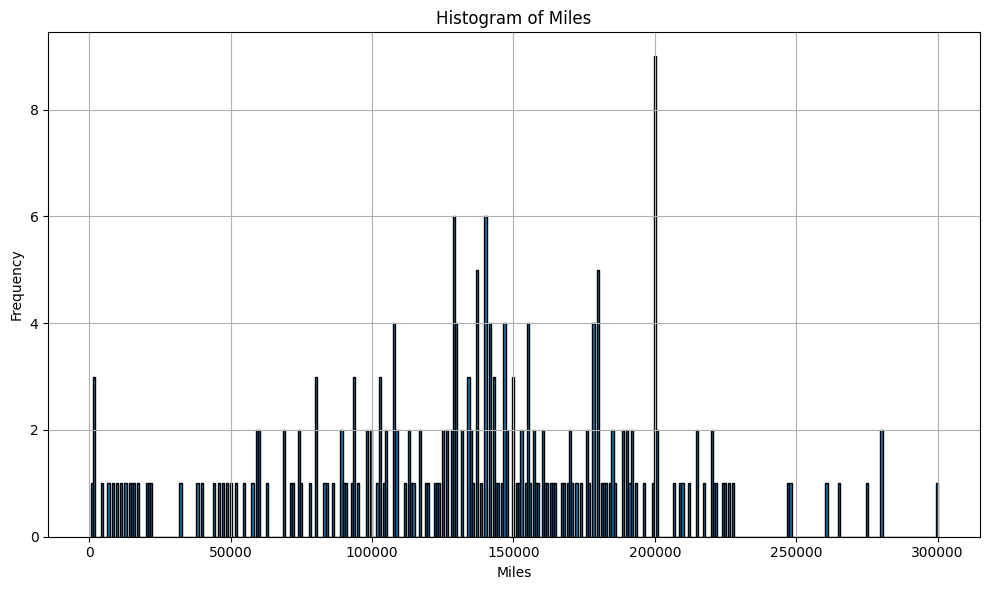

In [8]:
# Plotting histogram of 'Miles'
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.hist(filtered_df['Miles'], bins=400, edgecolor='black')  # Adjust number of bins as needed
plt.title('Histogram of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)
# Formatting x-axis ticks as integers
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()

# Show plot
plt.show()

In [9]:
filtered_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On,Dealership
2,Toyota camry LE Sedan 4D,2017,108000.0,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10,False
3,Honda civic SE Sedan 4D,2015,134000.0,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
9,Toyota camry LE Sedan 4D,2021,59000.0,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10,True
11,Honda civic SE Sedan 4D,2015,134000.0,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10,False
12,Honda accord EX Sedan 4D,2010,161000.0,"New Britain, CT","$5,900",https://www.facebook.com//marketplace/item/165...,2024-07-10,False
...,...,...,...,...,...,...,...,...
789,Honda accord LX-P Sedan 4D,2009,248000.0,"Hartford, CT","$4,499",https://www.facebook.com//marketplace/item/500...,2024-07-10,True
790,Honda accord EX Sedan 4D,2008,200000.0,"New Britain, CT","$3,500",https://www.facebook.com//marketplace/item/113...,2024-07-10,False
801,Honda acty,1995,47000.0,"East Windsor, CT","$3,999",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
806,Honda odyssey LX Minivan 4D,2016,93000.0,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10,False


In [10]:
new_df = filtered_df[filtered_df.Miles <= 150000]
new_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On,Dealership
2,Toyota camry LE Sedan 4D,2017,108000.0,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10,False
3,Honda civic SE Sedan 4D,2015,134000.0,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
9,Toyota camry LE Sedan 4D,2021,59000.0,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10,True
11,Honda civic SE Sedan 4D,2015,134000.0,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10,False
15,Honda accord EX Sedan 4D,2008,135000.0,"Hartford, CT","$5,500",https://www.facebook.com//marketplace/item/807...,2024-07-10,False
...,...,...,...,...,...,...,...,...
779,Toyota corolla LE Sedan 4D,2013,124000.0,"Bristol, CT","$8,295",https://www.facebook.com//marketplace/item/117...,2024-07-10,False
784,Honda acura,2012,1300.0,"New Britain, CT","$8,505",https://www.facebook.com//marketplace/item/984...,2024-07-10,False
801,Honda acty,1995,47000.0,"East Windsor, CT","$3,999",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
806,Honda odyssey LX Minivan 4D,2016,93000.0,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10,False


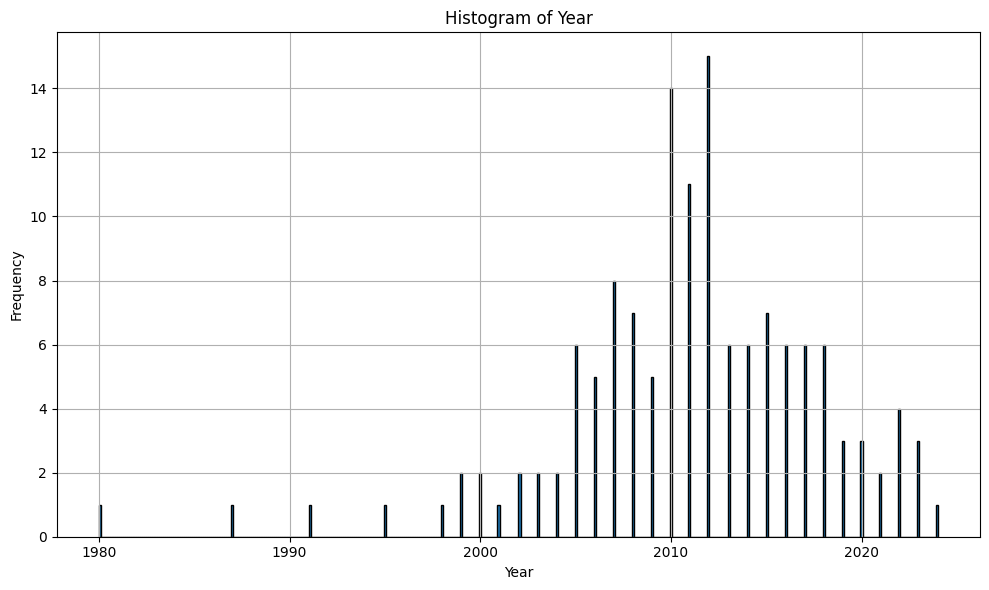

In [11]:
# Plotting histogram of 'Miles'
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.hist(new_df['Year'], bins=400, edgecolor='black')  # Adjust number of bins as needed
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
# Formatting x-axis ticks as integers
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()

# Show plot
plt.show()

In [12]:
year_df = new_df[new_df.Year >= 2005]
year_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On,Dealership
2,Toyota camry LE Sedan 4D,2017,108000.0,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10,False
3,Honda civic SE Sedan 4D,2015,134000.0,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
9,Toyota camry LE Sedan 4D,2021,59000.0,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10,True
11,Honda civic SE Sedan 4D,2015,134000.0,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10,False
15,Honda accord EX Sedan 4D,2008,135000.0,"Hartford, CT","$5,500",https://www.facebook.com//marketplace/item/807...,2024-07-10,False
...,...,...,...,...,...,...,...,...
708,Honda pilot,2016,95000.0,"Berlin, CT","$18,995",https://www.facebook.com//marketplace/item/127...,2024-07-10,False
779,Toyota corolla LE Sedan 4D,2013,124000.0,"Bristol, CT","$8,295",https://www.facebook.com//marketplace/item/117...,2024-07-10,False
784,Honda acura,2012,1300.0,"New Britain, CT","$8,505",https://www.facebook.com//marketplace/item/984...,2024-07-10,False
806,Honda odyssey LX Minivan 4D,2016,93000.0,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10,False


In [13]:
year_df

,Model,Year,Miles,Location,Prices,Link,Scraped_On,Dealership
2,Toyota camry LE Sedan 4D,2017,108000.0,"New Britain, CT","$10,500",https://www.facebook.com//marketplace/item/138...,2024-07-10,False
3,Honda civic SE Sedan 4D,2015,134000.0,"Wethersfield, CT","$6,400",https://www.facebook.com//marketplace/item/116...,2024-07-10,False
9,Toyota camry LE Sedan 4D,2021,59000.0,"New Britain, CT","$18,999",https://www.facebook.com//marketplace/item/149...,2024-07-10,True
11,Honda civic SE Sedan 4D,2015,134000.0,"New Britain, CT","$6,300",https://www.facebook.com//marketplace/item/437...,2024-07-10,False
15,Honda accord EX Sedan 4D,2008,135000.0,"Hartford, CT","$5,500",https://www.facebook.com//marketplace/item/807...,2024-07-10,False
...,...,...,...,...,...,...,...,...
708,Honda pilot,2016,95000.0,"Berlin, CT","$18,995",https://www.facebook.com//marketplace/item/127...,2024-07-10,False
779,Toyota corolla LE Sedan 4D,2013,124000.0,"Bristol, CT","$8,295",https://www.facebook.com//marketplace/item/117...,2024-07-10,False
784,Honda acura,2012,1300.0,"New Britain, CT","$8,505",https://www.facebook.com//marketplace/item/984...,2024-07-10,False
806,Honda odyssey LX Minivan 4D,2016,93000.0,"West Hartford, CT","$14,499",https://www.facebook.com//marketplace/item/884...,2024-07-10,False
